# Import libraries

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV , RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# Data Gathering

In [6]:
df = pd.read_csv('1.simple_loan_data.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
df.dropna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

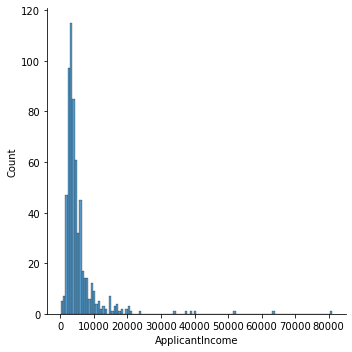

In [10]:
import seaborn as sns
sns.displot(df['ApplicantIncome'])
plt.show()

<AxesSubplot:>

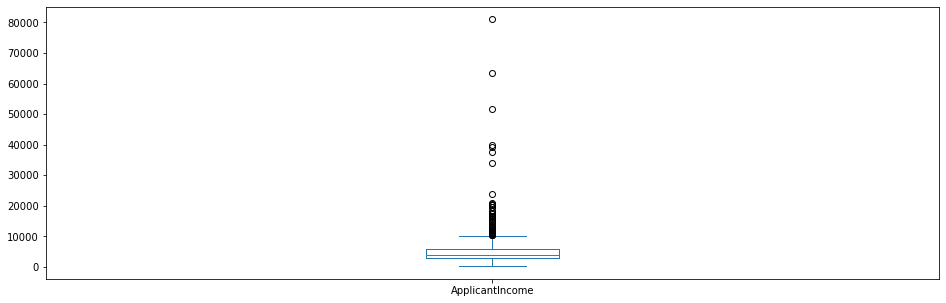

In [11]:
df['ApplicantIncome'].plot.box(figsize = (16,5))

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

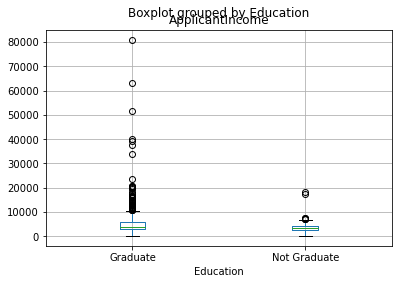

In [12]:
df.boxplot(column='ApplicantIncome',by = 'Education')


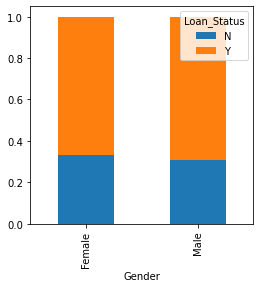

In [13]:
gender = pd.crosstab(df['Gender'],df['Loan_Status'])
gender.div(gender.sum(1).astype(float),axis = 0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

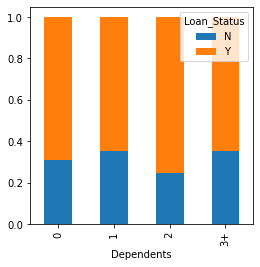

In [14]:
gender = pd.crosstab(df['Dependents'],df['Loan_Status'])
gender.div(gender.sum(1).astype(float),axis = 0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

<AxesSubplot:xlabel='ApplicantIncome'>

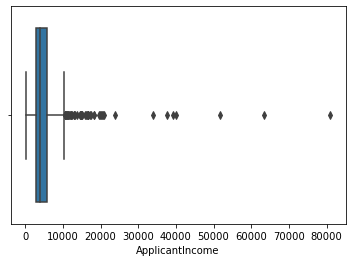

In [15]:
sns.boxplot(x=df['ApplicantIncome'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

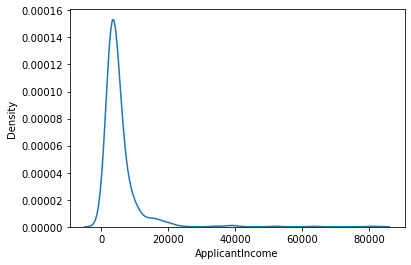

In [16]:
sns.kdeplot(x=df['ApplicantIncome'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

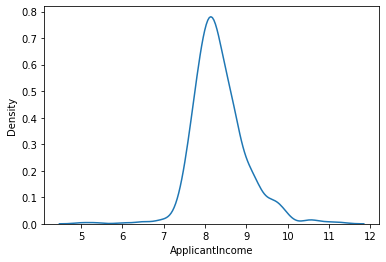

In [17]:
sns.kdeplot(x=np.log(df['ApplicantIncome']))

# feature engineering

In [18]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [19]:
df['Gender'].value_counts().to_dict()

{'Male': 489, 'Female': 112}

In [21]:
df['Gender'].replace({'Male':1,'Female':0},inplace=True)

In [23]:
df['Married'].value_counts().to_dict()

{'Yes': 398, 'No': 213}

In [24]:
df['Married'].replace({'Yes':1,'No':0},inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 62.5+ KB


In [26]:
df['Education'].value_counts().to_dict()

{'Graduate': 480, 'Not Graduate': 134}

In [27]:
df['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)

<AxesSubplot:xlabel='Gender', ylabel='count'>

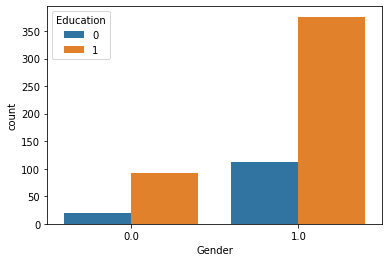

In [28]:
sns.countplot(x =df['Gender'], hue = df['Education'])

In [29]:
df['Self_Employed'].value_counts().to_dict()

{'No': 500, 'Yes': 82}

In [30]:
df['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)

In [31]:
df['Property_Area'].value_counts().to_dict()

{'Semiurban': 233, 'Urban': 202, 'Rural': 179}

In [32]:
df['Property_Area'].replace({'Semiurban':1,'Urban':2,'Rural':0},inplace=True)

In [33]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,0,Y
610,LP002979,1.0,1.0,3+,1,0.0,4106,0.0,40.0,180.0,1.0,0,Y
611,LP002983,1.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,2,Y
612,LP002984,1.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,2,Y


In [34]:
df['Dependents'].value_counts().to_dict()

{'0': 345, '1': 102, '2': 101, '3+': 51}

In [35]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [36]:
df['Dependents'].replace({'3+':3},inplace=True)

In [37]:
df['Dependents'].unique()

array(['0', '1', '2', 3, nan], dtype=object)

In [38]:
df['Dependents']=  df['Dependents'].astype(float)

In [39]:
df['Dependents'].replace({'Semiurban':1,'Urban':2,'Rural':0},inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      582 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    object 
dtypes: float64(8), int64(3), object(2)
memory usage: 62.5+ KB


# handling missing values

In [41]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [42]:
df.isna().mean()*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [43]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,0,Y
610,LP002979,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,0,Y
611,LP002983,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,2,Y
612,LP002984,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,2,Y


In [44]:
new_df= df.sort_values('Loan_Status')

In [45]:
new_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
613,LP002990,0.0,0.0,0.0,1,1.0,4583,0.0,133.0,360.0,0.0,1,N
489,LP002556,1.0,0.0,0.0,1,0.0,2435,0.0,75.0,360.0,1.0,2,N
186,LP001641,1.0,1.0,1.0,1,1.0,2178,0.0,66.0,300.0,0.0,0,N
487,LP002547,1.0,1.0,1.0,1,0.0,18333,0.0,500.0,360.0,1.0,2,N
486,LP002545,1.0,0.0,2.0,1,0.0,3547,0.0,80.0,360.0,0.0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,LP001788,0.0,0.0,0.0,1,1.0,3463,0.0,122.0,360.0,NaN,2,Y
235,LP001784,1.0,1.0,1.0,1,0.0,5500,1260.0,170.0,360.0,1.0,0,Y
234,LP001778,1.0,1.0,1.0,1,0.0,3155,1779.0,140.0,360.0,1.0,1,Y
252,LP001841,1.0,0.0,0.0,0,1.0,2583,2167.0,104.0,360.0,1.0,0,Y


<AxesSubplot:>

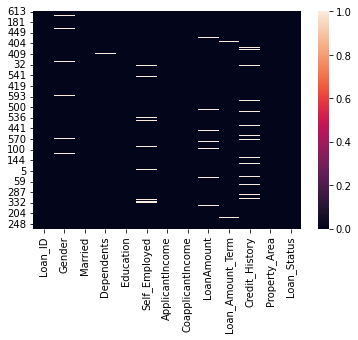

In [46]:
sns.heatmap(new_df.isna())

In [47]:
df['Gender'].mode()[0]

1.0

In [48]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace = True)

In [49]:
df.isna().mean()*100

Loan_ID              0.000000
Gender               0.000000
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [50]:
df['Married'].fillna(df['Married'].mode()[0],inplace = True)

In [51]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace = True)

In [52]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace = True)

In [53]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace = True)

In [54]:
df['LoanAmount'].mean()

146.41216216216216

In [55]:
mean_N = df.groupby('Loan_Status').get_group('N')['LoanAmount'].mean()
mean_N

151.22099447513813

In [56]:
mean_Y = df.groupby('Loan_Status').get_group('Y')['LoanAmount'].mean()
mean_Y

144.29440389294405

In [57]:
df.loc[df['Loan_Status']=='N','LoanAmount'] = df.loc[df['Loan_Status'] == 'N','LoanAmount'].fillna(mean_N)

In [58]:
df.loc[df['Loan_Status']=='Y','LoanAmount'] = df.loc[df['Loan_Status'] == 'Y','LoanAmount'].fillna(mean_Y)

In [59]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,144.294404,360.0,1.0,2,Y
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,N
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,Y
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0.0,1,0.0,2900,0.0,71.000000,360.0,1.0,0,Y
610,LP002979,1.0,1.0,3.0,1,0.0,4106,0.0,40.000000,180.0,1.0,0,Y
611,LP002983,1.0,1.0,1.0,1,0.0,8072,240.0,253.000000,360.0,1.0,2,Y
612,LP002984,1.0,1.0,2.0,1,0.0,7583,0.0,187.000000,360.0,1.0,2,Y


In [60]:
df['Credit_History'].mode()[0]

1.0

In [61]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace = True)

In [62]:
df['Loan_Amount_Term'].mode()[0]

360.0

In [63]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace = True)

In [64]:
df['Self_Employed'].mode()[0]

0.0

In [65]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace = True)

In [66]:
df['Self_Employed'].mode()[0]

0.0

In [67]:
df['Dependents'].mode()[0]

0.0

In [68]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace = True)

In [69]:
df['Married'].fillna(df['Married'].mode()[0],inplace = True)

In [70]:
df.isna().mean()*100

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    float64
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    object 
dtypes: float64(8), int64(3), object(2)
memory usage: 62.5+ KB


In [72]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,144.294404,360.0,1.0,2,Y
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,N
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,Y
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0.0,1,0.0,2900,0.0,71.000000,360.0,1.0,0,Y
610,LP002979,1.0,1.0,3.0,1,0.0,4106,0.0,40.000000,180.0,1.0,0,Y
611,LP002983,1.0,1.0,1.0,1,0.0,8072,240.0,253.000000,360.0,1.0,2,Y
612,LP002984,1.0,1.0,2.0,1,0.0,7583,0.0,187.000000,360.0,1.0,2,Y


# Train test split

In [73]:
x = df.drop(['Loan_ID','Loan_Status'],axis=1)
y = df['Loan_Status']
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=11,stratify = y)

In [74]:
x_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [75]:
y_train.value_counts()

Y    337
N    154
Name: Loan_Status, dtype: int64

# Train Logistic regression

In [76]:
log_clf = LogisticRegression()
log_clf.fit(x_train,y_train)

LogisticRegression()

# Evaluation¶

In [77]:
# Testing data evaluation
y_pred_log = log_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_log)
print('confusion matrix :\n',cnf_matrix)

acc_score_LR = accuracy_score(y_test,y_pred_log)
print("Accuracy Score : ",acc_score_LR)

clf_report = classification_report(y_test , y_pred_log)
print('classification_report : \n',clf_report)



confusion matrix :
 [[20 18]
 [ 1 84]]
Accuracy Score :  0.8455284552845529
classification_report : 
               precision    recall  f1-score   support

           N       0.95      0.53      0.68        38
           Y       0.82      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.76      0.79       123
weighted avg       0.86      0.85      0.83       123



In [78]:
# Training data evaluation
y_pred_train_log = log_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train_log)
print('confusion matrix :\n',cnf_matrix)

acc_score_LR = accuracy_score(y_train,y_pred_train_log)
print("Accuracy Score : ",acc_score_LR)

clf_report = classification_report(y_train,y_pred_train_log)
print('classification_report : \n',clf_report)


confusion matrix :
 [[ 61  93]
 [  9 328]]
Accuracy Score :  0.7922606924643585
classification_report : 
               precision    recall  f1-score   support

           N       0.87      0.40      0.54       154
           Y       0.78      0.97      0.87       337

    accuracy                           0.79       491
   macro avg       0.83      0.68      0.71       491
weighted avg       0.81      0.79      0.76       491



# K- Nearest Neighbor

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [113]:
# Testing data evaluation
y_pred_knn = knn_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_knn)
print('confusion matrix :\n',cnf_matrix)

acc_score_LR = accuracy_score(y_test,y_pred_knn)
print("Accuracy Score : ",acc_score_LR)

clf_report = classification_report(y_test , y_pred_knn)
print('classification_report : \n',clf_report)



confusion matrix :
 [[ 4 34]
 [11 74]]
Accuracy Score :  0.6341463414634146
classification_report : 
               precision    recall  f1-score   support

           N       0.27      0.11      0.15        38
           Y       0.69      0.87      0.77        85

    accuracy                           0.63       123
   macro avg       0.48      0.49      0.46       123
weighted avg       0.56      0.63      0.58       123



In [109]:
# Training data evaluation
y_pred_train_knn = knn_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train_knn)
print('confusion matrix :\n',cnf_matrix)

acc_score_LR = accuracy_score(y_train,y_pred_train_knn)
print("Accuracy Score : ",acc_score_LR)

clf_report = classification_report(y_train,y_pred_train_knn)
print('classification_report : \n',clf_report)


confusion matrix :
 [[ 53 101]
 [ 34 303]]
Accuracy Score :  0.725050916496945
classification_report : 
               precision    recall  f1-score   support

           N       0.61      0.34      0.44       154
           Y       0.75      0.90      0.82       337

    accuracy                           0.73       491
   macro avg       0.68      0.62      0.63       491
weighted avg       0.71      0.73      0.70       491



In [110]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [85]:
std_scaler = StandardScaler()
std_scaler.fit(x_train)

StandardScaler()

In [86]:
std_scaler.fit_transform(x_train)

array([[-2.13998726, -1.38658539, -0.7301645 , ...,  0.26148778,
         0.40094451, -1.30634407],
       [-2.13998726, -1.38658539, -0.7301645 , ...,  0.26148778,
        -2.49411071, -0.02862507],
       [ 0.4672925 ,  0.72119612, -0.7301645 , ...,  0.26148778,
         0.40094451, -0.02862507],
       ...,
       [-2.13998726,  0.72119612, -0.7301645 , ...,  0.26148778,
         0.40094451, -1.30634407],
       [-2.13998726,  0.72119612,  0.25475519, ...,  0.26148778,
         0.40094451,  1.24909394],
       [ 0.4672925 ,  0.72119612,  2.22459457, ..., -2.53366096,
         0.40094451,  1.24909394]])

In [87]:
std_scaler.transform(x_test)

array([[-2.13998726, -1.38658539, -0.7301645 , ...,  0.26148778,
         0.40094451,  1.24909394],
       [-2.13998726, -1.38658539, -0.7301645 , ...,  0.26148778,
         0.40094451, -0.02862507],
       [ 0.4672925 ,  0.72119612, -0.7301645 , ...,  0.26148778,
        -2.49411071,  1.24909394],
       ...,
       [ 0.4672925 ,  0.72119612,  0.25475519, ...,  0.26148778,
         0.40094451, -0.02862507],
       [ 0.4672925 ,  0.72119612,  1.23967488, ..., -4.02440696,
         0.40094451,  1.24909394],
       [-2.13998726, -1.38658539,  0.25475519, ...,  0.26148778,
         0.40094451, -0.02862507]])

# Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
dt_model = DecisionTreeClassifier()
#rscv_model.best_estimator_
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [91]:
# Testing data evaluation
y_pred_dt = dt_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_dt)
print('confusion matrix :\n',cnf_matrix)

acc_score_DT = accuracy_score(y_test,y_pred_dt)
print("Accuracy Score : ",acc_score_DT)

clf_report = classification_report(y_test , y_pred_dt)
print('classification_report : \n',clf_report)

# Accuracy Score :  0.6341463414634146

confusion matrix :
 [[30  8]
 [19 66]]
Accuracy Score :  0.7804878048780488
classification_report : 
               precision    recall  f1-score   support

           N       0.61      0.79      0.69        38
           Y       0.89      0.78      0.83        85

    accuracy                           0.78       123
   macro avg       0.75      0.78      0.76       123
weighted avg       0.81      0.78      0.79       123



In [92]:
# Training data evaluation
y_pred_train_dt= dt_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train_dt)
print('confusion matrix :\n',cnf_matrix)

acc_score = accuracy_score(y_train,y_pred_train_dt)
print("Accuracy Score : ",acc_score)

clf_report = classification_report(y_train,y_pred_train_dt)
print('classification_report : \n',clf_report)

confusion matrix :
 [[154   0]
 [  0 337]]
Accuracy Score :  1.0
classification_report : 
               precision    recall  f1-score   support

           N       1.00      1.00      1.00       154
           Y       1.00      1.00      1.00       337

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



In [93]:
dt_model=DecisionTreeClassifier()
hyp = {'criterion':['gini','entropy'],
       'max_depth':np.arange(2,10),
       'min_samples_split':np.arange(2,10),
       'min_samples_leaf':np.arange(2,10)
        
      
      }
rscv_model = RandomizedSearchCV(dt_model,hyp,random_state=10,cv=5)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
                   random_state=10)

In [94]:
rscv_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=3,
                       min_samples_split=9)

# Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rf_model = RandomForestClassifier()

rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [97]:
rf_model=rscv_model.best_estimator_
rf_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=3,
                       min_samples_split=9)

In [98]:
# Testing data evaluation
y_pred_rf = rf_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_rf)
print('confusion matrix :\n',cnf_matrix)

acc_score_RF = accuracy_score(y_test,y_pred_rf)
print("Accuracy Score : ",acc_score_RF)

clf_report = classification_report(y_test , y_pred_rf)
print('classification_report : \n',clf_report)

confusion matrix :
 [[20 18]
 [ 1 84]]
Accuracy Score :  0.8455284552845529
classification_report : 
               precision    recall  f1-score   support

           N       0.95      0.53      0.68        38
           Y       0.82      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.76      0.79       123
weighted avg       0.86      0.85      0.83       123



In [99]:
# Training data evaluation
y_pred_train_rf= rf_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train_rf)
print('confusion matrix :\n',cnf_matrix)

acc_score_rf = accuracy_score(y_train,y_pred_train_rf)
print("Accuracy Score : ",acc_score_rf)

clf_report = classification_report(y_train,y_pred_train_rf)
print('classification_report : \n',clf_report)

confusion matrix :
 [[ 62  92]
 [  6 331]]
Accuracy Score :  0.8004073319755601
classification_report : 
               precision    recall  f1-score   support

           N       0.91      0.40      0.56       154
           Y       0.78      0.98      0.87       337

    accuracy                           0.80       491
   macro avg       0.85      0.69      0.71       491
weighted avg       0.82      0.80      0.77       491



In [100]:
rf_model = RandomForestClassifier()
hyp = hyp = {'criterion':['gini','entropy'],
       'max_depth':np.arange(2,10),
       'min_samples_split':np.arange(2,10),
       'min_samples_leaf':np.arange(2,10),
             'n_estimators':np.arange(60,100),
             
      
      }
rscv_model = RandomizedSearchCV(rf_model,hyp,random_state=52,cv=5)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
       77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93,
       94, 95, 96, 97, 98, 99])},
                   random_state=52)

In [101]:
rscv_model.best_estimator_

RandomForestClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=9,
                       n_estimators=68)

In [114]:
print('acc_score_LR :',acc_score_LR,'acc_score_KNN :',acc_score_KNN,'acc_score_DT :',acc_score_DT,'acc_score_RF :',acc_score_RF,sep='\n')

acc_score_LR :
0.6341463414634146
acc_score_KNN :
0.6341463414634146
acc_score_DT :
0.7804878048780488
acc_score_RF :
0.8455284552845529
